In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Fill missing Age values
df["Age"] = df["Age"].fillna(df["Age"].median())

# Drop Cabin column
df = df.drop(columns=["Cabin"], errors="ignore")

# Drop remaining missing rows
df = df.dropna()

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt


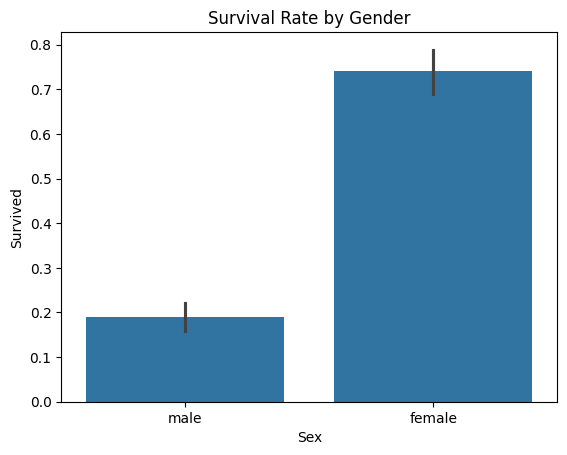

In [9]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


Females had a much higher survival rate than males.

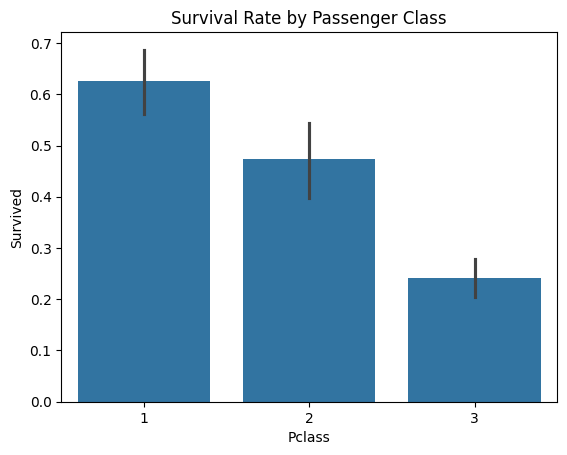

In [10]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

Passengers in 1st class had the highest survival chances.

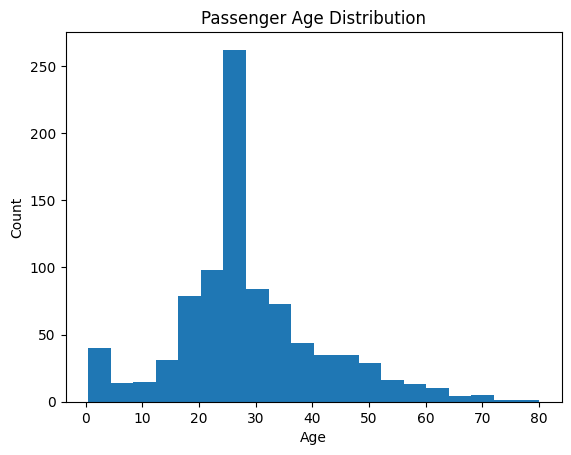

In [11]:
plt.hist(df["Age"], bins=20)
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Most passengers were between 20–40 years old.

In [12]:
#agegroup vs survived
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

df.groupby("AgeGroup")["Survived"].mean()

/tmp/ipython-input-3304836586.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


,Survived
AgeGroup,
Child,0.579710
Teen,0.428571
Young Adult,0.353271
Adult,0.396907
Senior,0.190476


## Conclusion
The analysis shows that survival on the Titanic depended strongly on gender, passenger class, and age.
Females and first-class passengers had much higher survival rates. Children were also prioritized
during evacuation, leading to better survival chances compared to adults and seniors.